In [1]:
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
import tensorflow as tf

np.random.seed(42)
tf.random.set_seed(42)

from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers.core import Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.layers.pooling import MaxPooling2D
from tensorflow.keras.utils import to_categorical
from sklearn import metrics


In [2]:
# specify the folder containing the files

adenocarcinoma_train_path = "/Users/elliestrande/Desktop/LungCancerData/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib"
largecellcarcinoma_train_path = "/Users/elliestrande/Desktop/LungCancerData/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa"
normal_train_path = "/Users/elliestrande/Desktop/LungCancerData/train/normal"
squamouscellcarcinoma_train_path = "/Users/elliestrande/Desktop/LungCancerData/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa"

adenocarcinoma_test_path = "/Users/elliestrande/Desktop/LungCancerData/test/adenocarcinoma"
largecellcarcinoma_test_path = "/Users/elliestrande/Desktop/LungCancerData/test/large.cell.carcinoma"
normal_test_path = "/Users/elliestrande/Desktop/LungCancerData/test/normal"
squamouscellcarcinoma_test_path = "/Users/elliestrande/Desktop/LungCancerData/test/squamous.cell.carcinoma"

In [3]:
img_list_train = []
labels_train = []

# label 0 = adenocarcinoma
# label 1 = large cell carcinoma
# label 2 = normal
# label 3 = squamous cell carcinoma
        
# import large cell carcinoma train images
for file in os.listdir(largecellcarcinoma_train_path):
    img_path = os.path.join(largecellcarcinoma_train_path, file)
    if img_path.endswith('.png'):
        img = Image.open(img_path).convert('RGB')
        img = img.resize((224,224))
        img_array = np.array(img)
        img_list_train.append(img_array)
        labels_train.append(1)
        
# import normal train images
for file in os.listdir(normal_train_path):
    img_path = os.path.join(normal_train_path, file)
    if img_path.endswith('.png'):
        img = Image.open(img_path).convert('RGB')
        img = img.resize((224,224))
        img_array = np.array(img)
        img_list_train.append(img_array)
        labels_train.append(2)
        
# import squamous cell carcinoma train images
for file in os.listdir(squamouscellcarcinoma_train_path):
    img_path = os.path.join(squamouscellcarcinoma_train_path, file)
    if img_path.endswith('.png'):
        img = Image.open(img_path).convert('RGB')
        img = img.resize((224,224))
        img_array = np.array(img)
        img_list_train.append(img_array)
        labels_train.append(3)
        
# convert the list to a numpy array
img_array_train = np.array(img_list_train)

# normalize the pixel values to be between 0 and 1
img_array_train = img_array_train / 255.0

# convert the labels to a numpy array 
labels_train = np.array(labels_train)

# print the shape of the array
print(img_array_train.shape)
print(labels_train.shape)

(406, 224, 224, 3)
(406,)


In [4]:
img_list_test = []
labels_test = []
        
# import large cell carcinoma test images
for file in os.listdir(largecellcarcinoma_test_path):
    img_path = os.path.join(largecellcarcinoma_test_path, file)
    if img_path.endswith('.png'):
        img = Image.open(img_path).convert('RGB')
        img = img.resize((224,224))
        img_array = np.array(img)
        img_list_test.append(img_array)
        labels_test.append(1)
        
# import normal test images
for file in os.listdir(normal_test_path):
    img_path = os.path.join(normal_test_path, file)
    if img_path.endswith('.png'):
        img = Image.open(img_path).convert('RGB')
        img = img.resize((224,224))
        img_array = np.array(img)
        img_list_test.append(img_array)
        labels_test.append(2)
        
# import squamous cell carcinoma test images
for file in os.listdir(squamouscellcarcinoma_test_path):
    img_path = os.path.join(squamouscellcarcinoma_test_path, file)
    if img_path.endswith('.png'):
        img = Image.open(img_path).convert('RGB')
        img = img.resize((224,224))
        img_array = np.array(img)
        img_list_test.append(img_array)
        labels_test.append(3)
        
# convert the list to a numpy array
img_array_test = np.array(img_list_test)

# normalize the pixel values to be between 0 and 1
img_array_test = img_array_test / 255.0

# convert the labels to a numpy array 
labels_test = np.array(labels_test)

# print the shape of the array
print(img_array_test.shape)
print(labels_test.shape)

(195, 224, 224, 3)
(195,)


## Benign vs Malignant

In [22]:
# label 0 = benign (normal)
# label 1 = malignant (all other types)

new_labels_train = np.where(labels_train == 2, 0, 1)
new_labels_test = np.where(labels_test == 2, 0, 1)

In [23]:
X_train1 = img_array_train
X_test1 = img_array_test
Y_train1 = new_labels_train
Y_test1 = new_labels_test

print("Shape of X_train:", X_train1.shape)
print("Shape of y_train:", Y_train1.shape)
print("Shape of X_test:", X_test1.shape)
print("Shape of y_test:", Y_test1.shape)



Shape of X_train: (406, 224, 224, 3)
Shape of y_train: (406,)
Shape of X_test: (195, 224, 224, 3)
Shape of y_test: (195,)


In [24]:
model1 = Sequential()

model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model1.add(MaxPooling2D((2, 2)))

model1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))

model1.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))

model1.add(Flatten())
model1.add(Dense(1024, activation='relu'))
model1.add(Dropout(0.5))

# Output layer for binary classification
model1.add(Dense(1, activation='sigmoid'))  # 1 unit for binary classification, sigmoid activation

# Compile the model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Use binary_crossentropy for binary classification

In [25]:
model1.compile(loss='binary_crossentropy',  # Use binary_crossentropy for binary classification
              optimizer=Adam(learning_rate=0.0001, decay=1e-6),
              metrics=['accuracy'])  # Use accuracy for binary classification

In [26]:
history = model1.fit(img_array_train, new_labels_train,  # Changed Y_train to new_labels_train
                    batch_size=128,
                    shuffle=True,
                    epochs= 10,
                    validation_data=(img_array_test, new_labels_test),  # Changed Y_test to new_labels_test
                    verbose=1)  # You can set verbose to 1 for training progress updates

Epoch 1/10
4/4 [==============================] - 10s 2s/step - loss: 0.6897 - accuracy: 0.5123 - val_loss: 0.4809 - val_accuracy: 0.8821
Epoch 2/10
4/4 [==============================] - 8s 2s/step - loss: 0.5654 - accuracy: 0.7094 - val_loss: 0.3982 - val_accuracy: 0.9077
Epoch 3/10
4/4 [==============================] - 7s 2s/step - loss: 0.4455 - accuracy: 0.8695 - val_loss: 0.3184 - val_accuracy: 0.9077
Epoch 4/10
4/4 [==============================] - 6s 2s/step - loss: 0.3416 - accuracy: 0.9261 - val_loss: 0.2408 - val_accuracy: 0.9077
Epoch 5/10
4/4 [==============================] - 5s 1s/step - loss: 0.2650 - accuracy: 0.9310 - val_loss: 0.1909 - val_accuracy: 0.9385
Epoch 6/10
4/4 [==============================] - 6s 1s/step - loss: 0.2088 - accuracy: 0.9187 - val_loss: 0.1333 - val_accuracy: 0.9897
Epoch 7/10
4/4 [==============================] - 5s 1s/step - loss: 0.1458 - accuracy: 0.9680 - val_loss: 0.1130 - val_accuracy: 0.9795
Epoch 8/10
4/4 [========================

In [27]:
history_dict1 = history.history

history_dict1.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

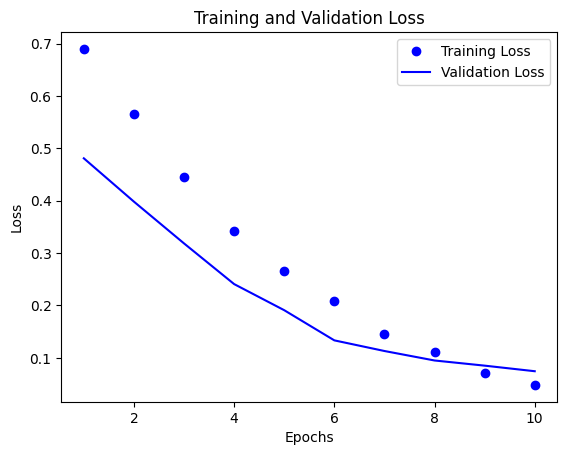

In [28]:
# graph training and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

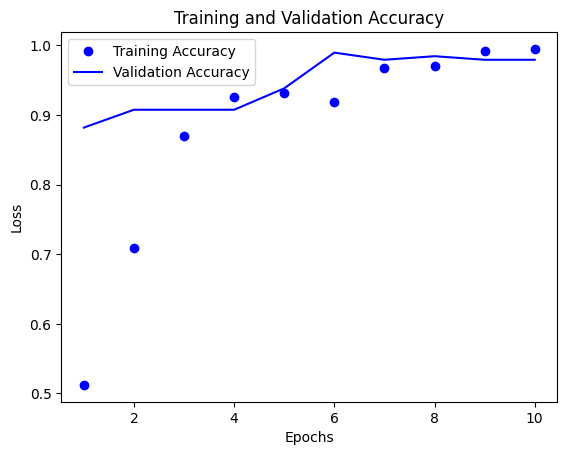

In [29]:
# plot training and validation accuracy 
accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show

## Various Types of Cancer

In [10]:
X_train = img_array_train
X_test = img_array_test
Y_train = labels_train
Y_test = labels_test

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", Y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", Y_test.shape)


Shape of X_train: (406, 224, 224, 3)
Shape of y_train: (406,)
Shape of X_test: (195, 224, 224, 3)
Shape of y_test: (195,)


In [11]:
# Shuffle the training set
shuffle_index_train = np.random.permutation(len(X_train))
X_train_shuffled = X_train[shuffle_index_train]
y_train_shuffled = Y_train[shuffle_index_train]

# Shuffle the test set
shuffle_index_test = np.random.permutation(len(X_test))
X_test_shuffled = X_test[shuffle_index_test]
y_test_shuffled = Y_test[shuffle_index_test]


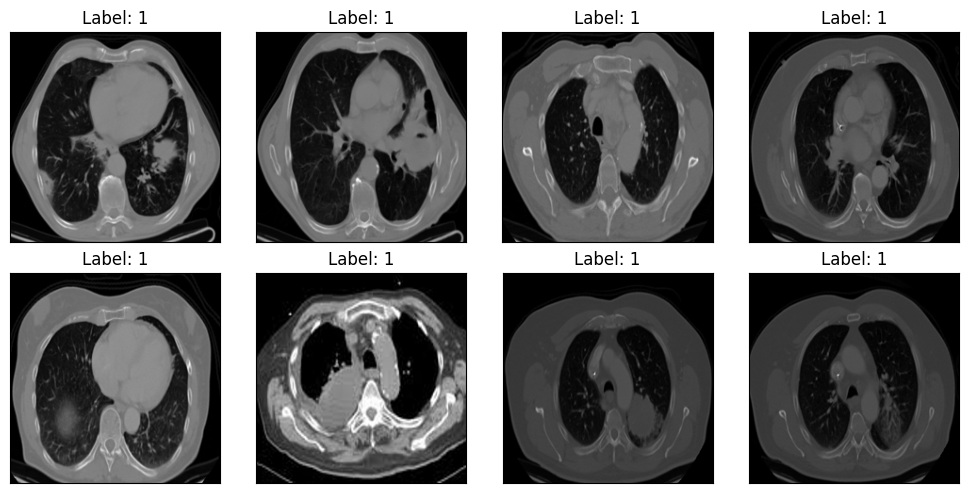

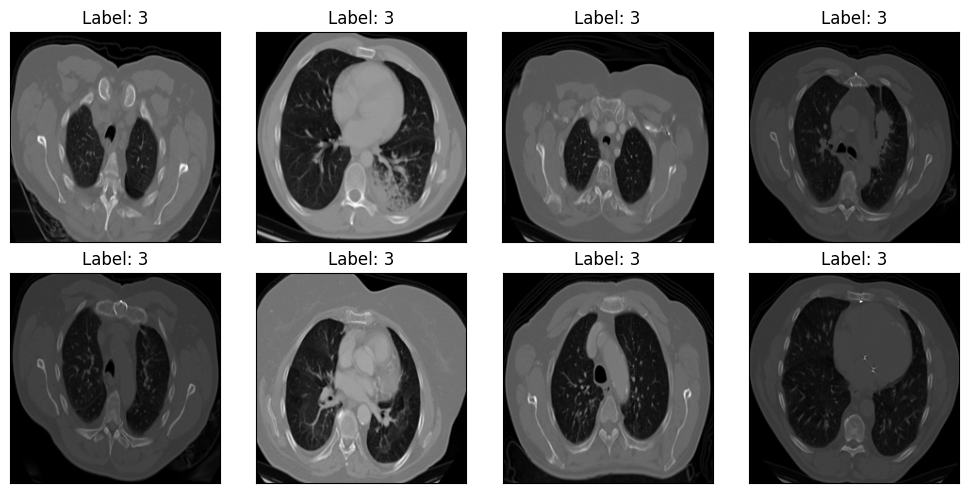

In [12]:
# Create a function to plot a grid of images
def plot_images(images, labels, start_idx, end_idx, rows=2, cols=4):
    fig, axes = plt.subplots(rows, cols, figsize=(10,5))
    for i, ax in enumerate(axes.flat):
        img_idx = start_idx + i
        if img_idx < end_idx:
            ax.imshow(images[img_idx])
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_title("Label: {}".format(labels[img_idx]))
    plt.tight_layout()
    plt.show()

# Plot the first 8 and last 8 images
plot_images(img_array_train, labels_train, 0, 8)
plot_images(img_array_train, labels_train, len(img_array_train) - 8, len(img_array_train))

In [13]:
# initializing the model
model = Sequential()

# defining a convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
                 input_shape=(224, 224, 3)))  # Updated input shape

# define a max pooling layer
model.add(MaxPooling2D((2, 2)))

# defining a second convolutional layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

model.add(MaxPooling2D((2, 2)))

# defining a third convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(MaxPooling2D((2, 2)))

# flatten the output and add fully connected layers
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))

# output layer with softmax activation function for multi-class classification
model.add(Dense(4, activation='softmax'))  # 4 classes, so use softmax

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
 # compiling the model
model.compile(loss='sparse_categorical_crossentropy',  # Updated loss function
              optimizer=Adam(learning_rate=0.0001, decay=1e-6),
              metrics=['accuracy'])

In [15]:
# training the model
history = model.fit(X_train, Y_train,  # Changed Y_train to y_train
                    batch_size=128,
                    shuffle=True,
                    epochs=34,
                    validation_data=(X_test, Y_test))  # Changed Y_test to y_test

Epoch 1/34
4/4 [==============================] - 8s 2s/step - loss: 1.4310 - accuracy: 0.3300 - val_loss: 1.0869 - val_accuracy: 0.4974
Epoch 2/34
4/4 [==============================] - 5s 1s/step - loss: 1.0575 - accuracy: 0.4532 - val_loss: 0.9724 - val_accuracy: 0.2769
Epoch 3/34
4/4 [==============================] - 6s 2s/step - loss: 0.9188 - accuracy: 0.4360 - val_loss: 0.8196 - val_accuracy: 0.7179
Epoch 4/34
4/4 [==============================] - 5s 1s/step - loss: 0.7815 - accuracy: 0.6700 - val_loss: 0.7709 - val_accuracy: 0.6821
Epoch 5/34
4/4 [==============================] - 4s 1s/step - loss: 0.6899 - accuracy: 0.8054 - val_loss: 0.7003 - val_accuracy: 0.7795
Epoch 6/34
4/4 [==============================] - 4s 881ms/step - loss: 0.5754 - accuracy: 0.8424 - val_loss: 0.6297 - val_accuracy: 0.7436
Epoch 7/34
4/4 [==============================] - 5s 1s/step - loss: 0.4790 - accuracy: 0.8744 - val_loss: 0.6226 - val_accuracy: 0.7487
Epoch 8/34
4/4 [======================

In [16]:
# get predicted labels for test data
y_pred = model.predict(X_test)

# convert predicted probabilities to predicted class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate confusion matrix
conf_mat = confusion_matrix(Y_test, y_pred_classes)

# Assuming the classes are ordered from 0 to 3, you can calculate sensitivity and specificity for each class
for i in range(3):
    class_sensitivity = conf_mat[i, i] / np.sum(conf_mat[i, :])
    class_specificity = np.sum(conf_mat[np.delete(range(3), i), :][:, np.delete(range(3), i)]) / np.sum(conf_mat[np.delete(range(3), i), :])
    print(f"Class {i} Sensitivity:", class_sensitivity)
    print(f"Class {i} Specificity:", class_specificity)


7/7 [==============================] - 1s 80ms/step
Class 0 Sensitivity: 0.6470588235294118
Class 0 Specificity: 0.8194444444444444
Class 1 Sensitivity: 0.9629629629629629
Class 1 Specificity: 0.9787234042553191
Class 2 Sensitivity: 0.7
Class 2 Specificity: 0.8285714285714286


In [17]:
loss, accuracy = model.evaluate(X_test, Y_test)

# Print the loss and accuracy
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")

7/7 [==============================] - 1s 78ms/step - loss: 0.8009 - accuracy: 0.7590
Test Loss: 0.8009
Test Accuracy: 75.90%


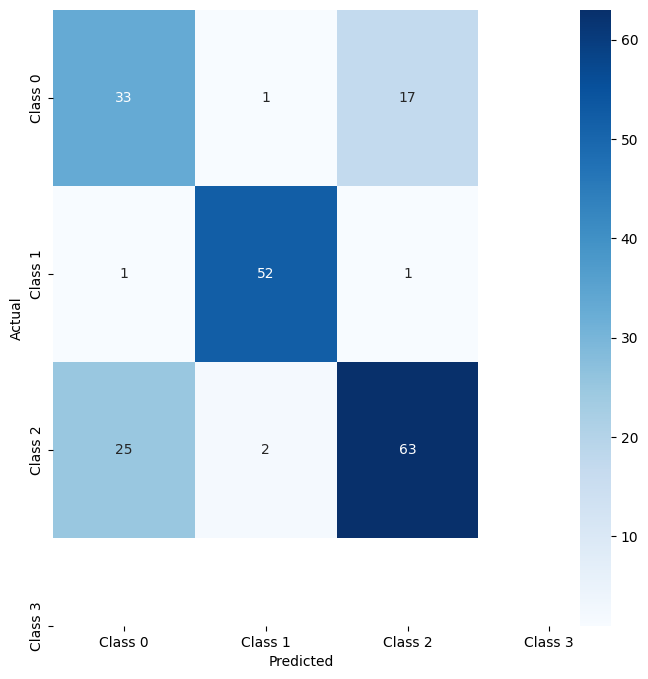

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(conf_mat, classes):
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Assuming `classes` is a list of class labels like ['Class 0', 'Class 1', 'Class 2', 'Class 3']
classes = ['Class 0', 'Class 1', 'Class 2', 'Class 3']

# Calculate confusion matrix
conf_mat = confusion_matrix(Y_test, y_pred_classes)

# Plot the confusion matrix
plot_confusion_matrix(conf_mat, classes)

In [19]:
history_dict = history.history

history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

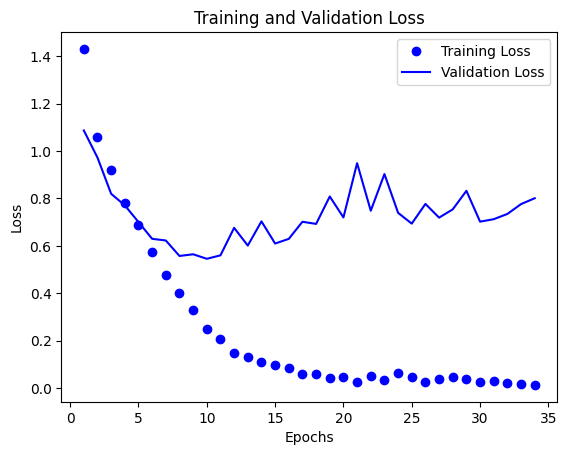

In [20]:
# graph training and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

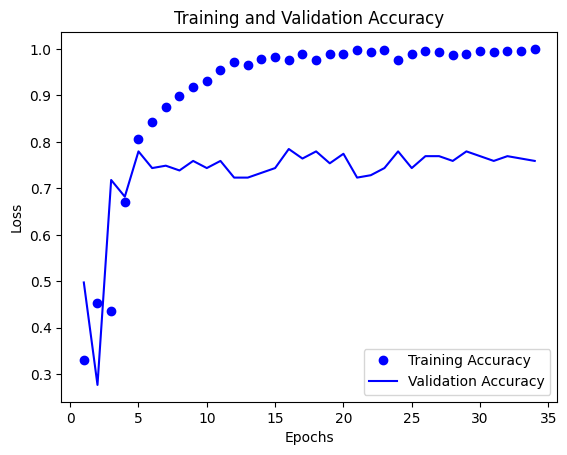

In [21]:
# plot training and validation accuracy 
accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show